In [2]:
%load_ext autoreload
%autoreload 2

print("Loading imports...")
# Aquaplanet analysis config file

import numpy as np

# Plotting
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import ticker as mticker
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
from cartopy import util as cutil

# Auxiliary functions

sys.path.insert(0, "/glade/u/home/sressel/thesis_work/python/auxiliary_functions/")
# from auxiliary_functions.modified_colormap import modified_colormap
from bmh_colors import bmh_colors
from one_two_one_filter import one_two_one_filter
from tick_labeller import tick_labeller
from rounding_functions import round_out

print("Imports loaded")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading imports...
Imports loaded


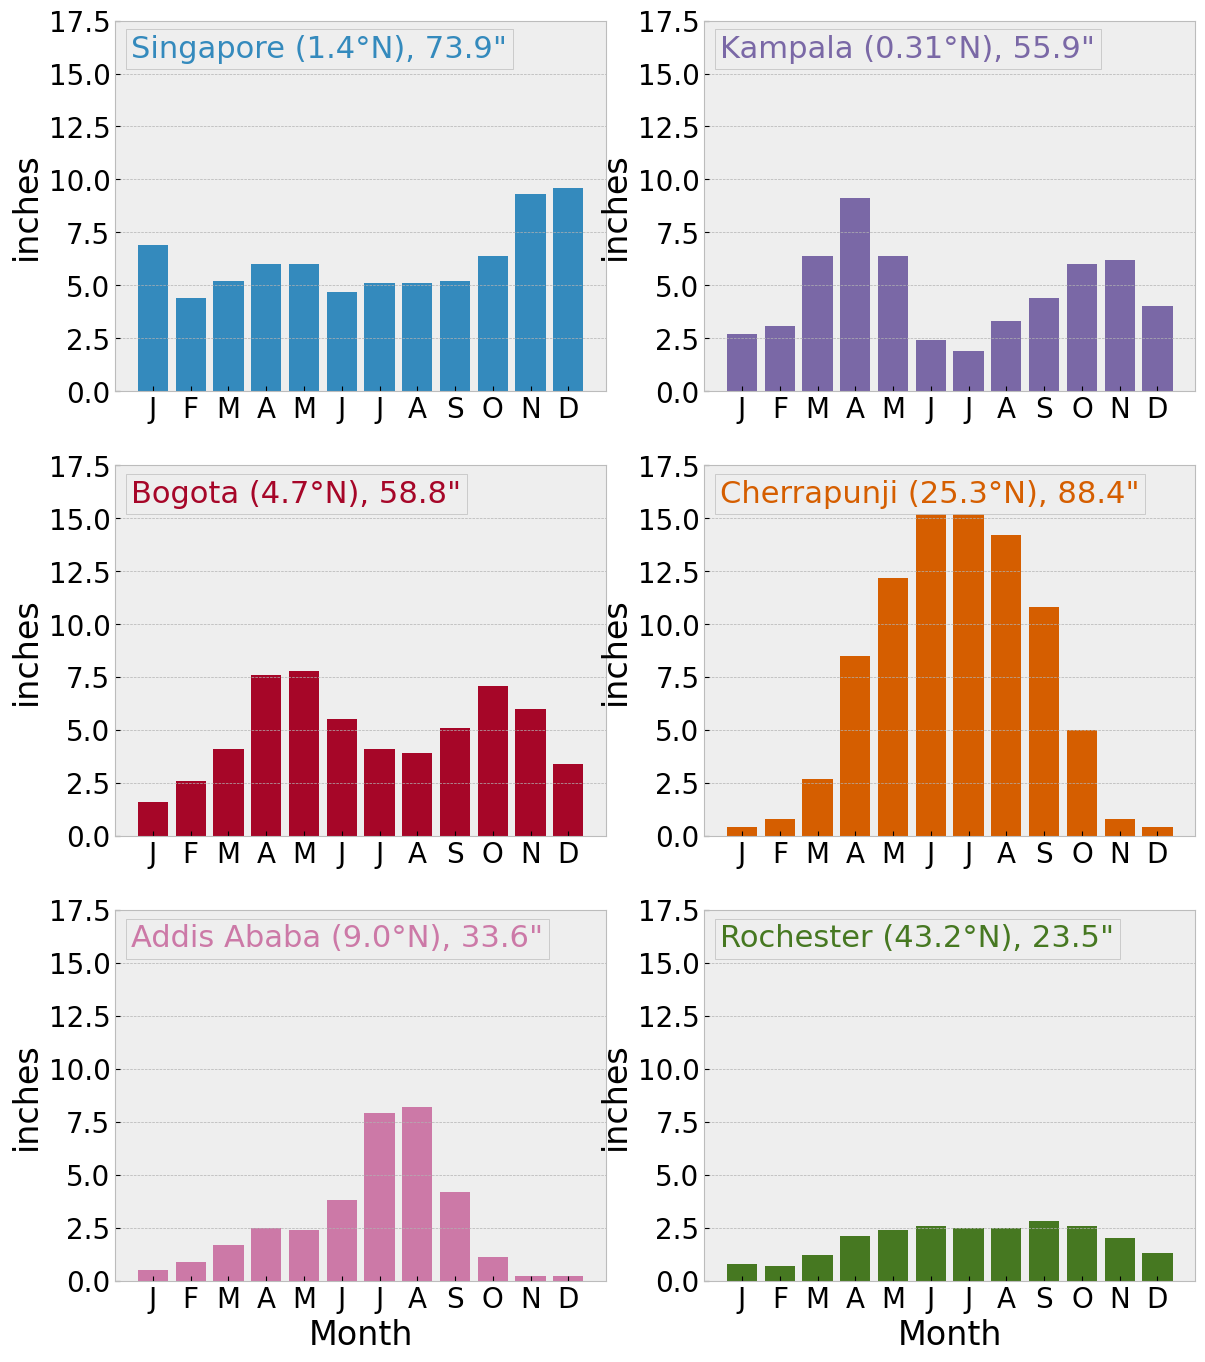

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec

singapore_rainfall = np.array([6.9, 4.4,	5.2,	6.0,	6.0,	4.7,	5.1,	5.1,	5.2,	6.4,	9.3,	9.6])
bogota_rainfall = np.array([1.6,	2.6,	4.1,	7.6,	7.8,	5.5,	4.1,	3.9,	5.1,	7.1,	6.0,	3.4,])
sao_paulo_rainfall = np.array([8.5,	7.8,	5.9,	3.5,	2.6,	2.3,	1.8,	1.6,	3.7,	4.1,	4.9,	7.0,])
rochester_rainfall = np.array([0.8,	0.7,	1.2,	2.1,	2.4,	2.6,	2.5,	2.5,	2.8,	2.6,	2.0,	1.3,])
seattle_rainfall = np.array([6.0,	5.2,	4.5,	3.1,	2.2,	1.6,	0.7,	0.9,	1.8,	4.4,	7.5,	6.6,])
cherrapunji_rainfall = np.array([0.4,	0.8,	2.7,	8.5,	12.2,	16.2,	16.4,	14.2,	10.8,	5.0,	0.8,	0.4,])
addis_ababa_rainfall = np.array([0.5,	0.9,	1.7,	2.5,	2.4,	3.8,	7.9,	8.2,	4.2,	1.1,	0.2,	0.2,])
kampala_rainfall = np.array([2.7,	3.1,	6.4,	9.1,	6.4,	2.4,	1.9,	3.3,	4.4,	6.0,	6.2,	4.0,])

plt.style.use('bmh')
plt.rcParams.update({'font.size':20})
fig = plt.figure(figsize=(12, 14))
gs_main = fig.add_gridspec(3, 2)
gs_main.update(left=0.05, right=0.95, bottom=0.05, top=0.95)

axes = []
axes.append(fig.add_subplot(gs_main[0,0]))
axes.append(fig.add_subplot(gs_main[1,0]))
axes.append(fig.add_subplot(gs_main[2,0]))
axes.append(fig.add_subplot(gs_main[0,1]))
axes.append(fig.add_subplot(gs_main[1,1]))
axes.append(fig.add_subplot(gs_main[2,1]))

axes[0].bar(x=np.arange(1,13,1), height=singapore_rainfall, color=bmh_colors(0+1))
# axes[1].bar(x=np.arange(1,13,1), height=seattle_rainfall, color=bmh_colors(1+1))
axes[1].bar(x=np.arange(1,13,1), height=bogota_rainfall, color=bmh_colors(1+1))
axes[3].bar(x=np.arange(1,13,1), height=kampala_rainfall, color=bmh_colors(2+1))
axes[5].bar(x=np.arange(1,13,1), height=rochester_rainfall, color=bmh_colors(3+1))
axes[4].bar(x=np.arange(1,13,1), height=cherrapunji_rainfall, color=bmh_colors(4+1))
axes[2].bar(x=np.arange(1,13,1), height=addis_ababa_rainfall, color=bmh_colors(5+1))

text_x = 0.425
text_y = 15.75
axes[0].text(
    x=text_x, y=text_y,
    s="singapore".replace("_", " ").title()+" (1.4°N), " + f"{np.sum(singapore_rainfall):0.1f}\"",
    bbox={'edgecolor':'#bcbcbc', 'facecolor':'#eeeeee'},
    color=bmh_colors(0+1),
    fontsize=22
)
axes[1].text(
    x=text_x, y=text_y,
    s="bogota".replace("_", " ").title()+" (4.7°N), " + f"{np.sum(bogota_rainfall):0.1f}\"",
    bbox={'edgecolor':'#bcbcbc', 'facecolor':'#eeeeee'},
    color=bmh_colors(1+1),
    fontsize=22
)
axes[3].text(
    x=text_x, y=text_y,
    s="kampala".replace("_", " ").title()+" (0.31°N), " + f"{np.sum(kampala_rainfall):0.1f}\"",
    bbox={'edgecolor':'#bcbcbc', 'facecolor':'#eeeeee'},
    color=bmh_colors(2+1),
    fontsize=22
)
axes[5].text(
    x=text_x, y=text_y,
    s="rochester".replace("_", " ").title()+" (43.2°N), " + f"{np.sum(rochester_rainfall):0.1f}\"",
    bbox={'edgecolor':'#bcbcbc', 'facecolor':'#eeeeee'},
    color=bmh_colors(3+1),
    fontsize=22
)
axes[4].text(
    x=text_x, y=text_y,
    s="cherrapunji".replace("_", " ").title()+" (25.3°N), " + f"{np.sum(cherrapunji_rainfall):0.1f}\"",
    bbox={'edgecolor':'#bcbcbc', 'facecolor':'#eeeeee'},
    color=bmh_colors(4+1),
    fontsize=22
)
axes[2].text(
    x=text_x, y=text_y,
    s="addis_ababa".replace("_", " ").title()+" (9.0°N), " + f"{np.sum(addis_ababa_rainfall):0.1f}\"",
    bbox={'edgecolor':'#bcbcbc', 'facecolor':'#eeeeee'},
    color=bmh_colors(5+1),
    fontsize=22
)

for ax in axes:
    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_xlim(0, 13)
    # ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
    # ax.set_xlabel('Month')
    ax.set_ylabel('inches')
    ax.set_ylim(0, 17.5)
    ax.set_yticks(np.arange(0, 17.5+2.5, 2.5))
    ax.grid(axis='x')
axes[2].set_xlabel('Month')
axes[5].set_xlabel('Month')

# fig.suptitle(
#     'Monthly Rainfall Totals',
#     x=(axes[0].get_position().x0 + axes[4].get_position().x1)/2,
#     ha='center',
#     y=1.005,
#     fontsize=20
# )
# ax.set_yticks(np.arange(0, 110, 10))
# ax.yaxis.set_major_locator(mticker.MaxNLocator(10, prune="lower"))
# ax.axhline(y=32, lw=2, ls=":", color='k')

# ax.legend()
plt.show()

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
import xarray as xr

singapore_temperature = [80,	81,	82,	83,	83,	84,	83,	83,	82,	82,	81,	80]
addis_ababa_temperature = [61,	63,	64,	64,	65,	62,	59,	59,	60,	61,	60,	59]
kampala_temperature = [72,	73,	73,	72,	71,	70,	69,	69,	70,	70,	71,	71]
seattle_temperature = [42,	44,	47,	51,	57,	62,	66,	67,	62,	53,	46,	41]
lilongwe_temperature = [73,	72,	72,	70,	67,	63,	63,	66,	71,	75,	76,	74]
panama_city_temperature = [81,	81,	82,	83,	81,	81,	81,	80,	80,	80,	80,	80]

singapore_rainfall = [6.9, 4.4,	5.2,	6.0,	6.0,	4.7,	5.1,	5.1,	5.2,	6.4,	9.3,	9.6]
addis_ababa_rainfall = [0.5,	0.9,	1.7,	2.5,	2.4,	3.8,	7.9,	8.2,	4.2,	1.1,	0.2,	0.2]
kampala_rainfall = [2.7,	3.1,	6.4,	9.1,	6.4,	2.4,	1.9,	3.3,	4.4,	6.0,	6.2,	4.0]
seattle_rainfall = [6.0,	5.2,	4.5,	3.1,	2.2,	1.6,	0.7,	0.9,	1.8,	4.4,	7.5,	6.6]
lilongwe_rainfall = [10.5,	8.4,	5.7,	1.6,	0.2,	0.0,	0.0,	0.0,	0.1,	0.5,	2.8,	8.2]
panama_city_rainfall = [0.6,	0.2,	0.4,	2.5,	6.1,	6.8,	6.0,	6.3,	6.9,	7.5,	7.1,	3.3,]

singapore_day_hours = [12.1,	12.1,	12.1,	12.1,	12.2,	12.2,	12.2,	12.2,	12.1,	12.1,	12.1,	12.1]
addis_ababa_day_hours = [11.7,	11.8,	12.1,	12.3,	12.5,	12.6,	12.6,	12.4,	12.2,	11.9,	11.7,	11.6]
kampala_day_hours = [12.1,	12.1,	12.1,	12.1,	12.1,	12.1,	12.1,	12.1,	12.1,	12.1,	12.1,	12.1]
seattle_day_hours = [9.0,	10.3,	12.0,	13.7,	15.2,	15.9,	15.5,	14.1,	12.5,	10.8,	9.3,	8.5]
lilongwe_day_hours = [12.8,	12.5,	12.2,	11.8,	11.5,	11.3,	11.4,	11.7,	12.0,	12.4,	12.8,	12.9]
panama_city_day_hours = [11.7,	11.9,	12.1,	12.3,	12.5,	12.6,	12.6,	12.4,	12.2,	11.9,	11.7,	11.6,]

latitudes = ["1.3°N", "9.0°N", "0.3°N", "47.6°N", "13.9°S", "9.0°N"]

data = xr.Dataset(
    data_vars = dict(
        temperature = (
            ["city", "month"],
            np.array([
                singapore_temperature,
                addis_ababa_temperature,
                kampala_temperature ,
                seattle_temperature,
                lilongwe_temperature,
                panama_city_temperature
            ])
        ),
        rainfall = (
            ["city", "month"],
            np.array([
                singapore_rainfall,
                addis_ababa_rainfall,
                kampala_rainfall ,
                seattle_rainfall,
                lilongwe_rainfall,
                panama_city_rainfall
            ])
        ),
        day_hours = (
            ["city", "month"],
            np.array([
                singapore_day_hours,
                addis_ababa_day_hours,
                kampala_day_hours,
                seattle_day_hours,
                lilongwe_day_hours,
                panama_city_day_hours
            ])
        ),
    ),
    coords = dict(
        city = ("city", ["Singapore", "Addis Ababa", "Kampala", "Seattle", "Lilongwe", "Panama City"]),
        month = ("month", ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    )
)

data = data.assign_coords(latitude=("city", latitudes))
city_colors = {city: 1+idx for idx, city in enumerate(data.city.values)}

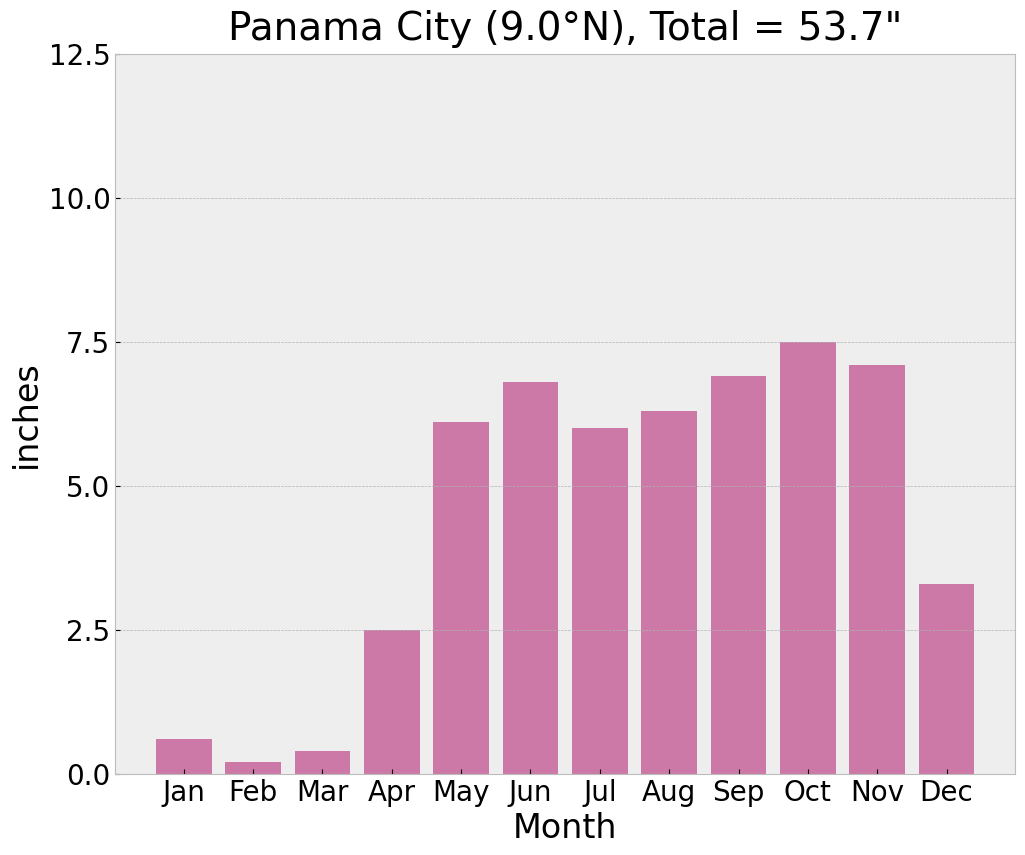

In [118]:
city_to_plot = 'Panama City'

plt.style.use('bmh')
plt.rcParams.update({'font.size':20})
fig = plt.figure(figsize=(10, 8))
gs_main = fig.add_gridspec(1, 1)
gs_main.update(left=0.05, right=0.95, bottom=0.05, top=0.95)

axes = []
axes.append(fig.add_subplot(gs_main[0,0]))
axes[0].bar(
    x=data['rainfall'].month,
    height=data['rainfall'].sel(city=city_to_plot),
    color=bmh_colors(city_colors[city_to_plot])
)

text_x = 0.425
text_y = 13.75
# axes[0].text(
#     x=text_x, y=text_y,
#     s=f"{city_to_plot.name} ({city_to_plot.lat}), {city_to_plot.sum(dim='month'):0.1f}\"",
#     bbox={'edgecolor':'#bcbcbc', 'facecolor':'#eeeeee'},
#     color=bmh_colors(0+1),
#     fontsize=22
# )

axes[0].set_title(
    label=f"{city_to_plot} ({data.sel(city=city_to_plot).latitude.values}), Total = {data['rainfall'].sel(city=city_to_plot).sum(dim='month'):0.1f}\"",
    pad=10,
    fontsize=28
)

for ax in axes:
    ax.set_xlabel('Month')
    ax.set_ylabel('inches')
    ax.set_ylim(0, 12.5)
    ax.set_yticks(np.arange(0, 12.5+2.5, 2.5))
    ax.grid(axis='x')
axes[0].set_xlabel('Month')
axes[0].set_xlabel('Month')

# fig.suptitle(
#     'Monthly Rainfall Totals',
#     x=(axes[0].get_position().x0 + axes[4].get_position().x1)/2,
#     ha='center',
#     y=1.005,
#     fontsize=20
# )
# ax.set_yticks(np.arange(0, 110, 10))
# ax.yaxis.set_major_locator(mticker.MaxNLocator(10, prune="lower"))
# ax.axhline(y=32, lw=2, ls=":", color='k')

# ax.legend()
plt.show()

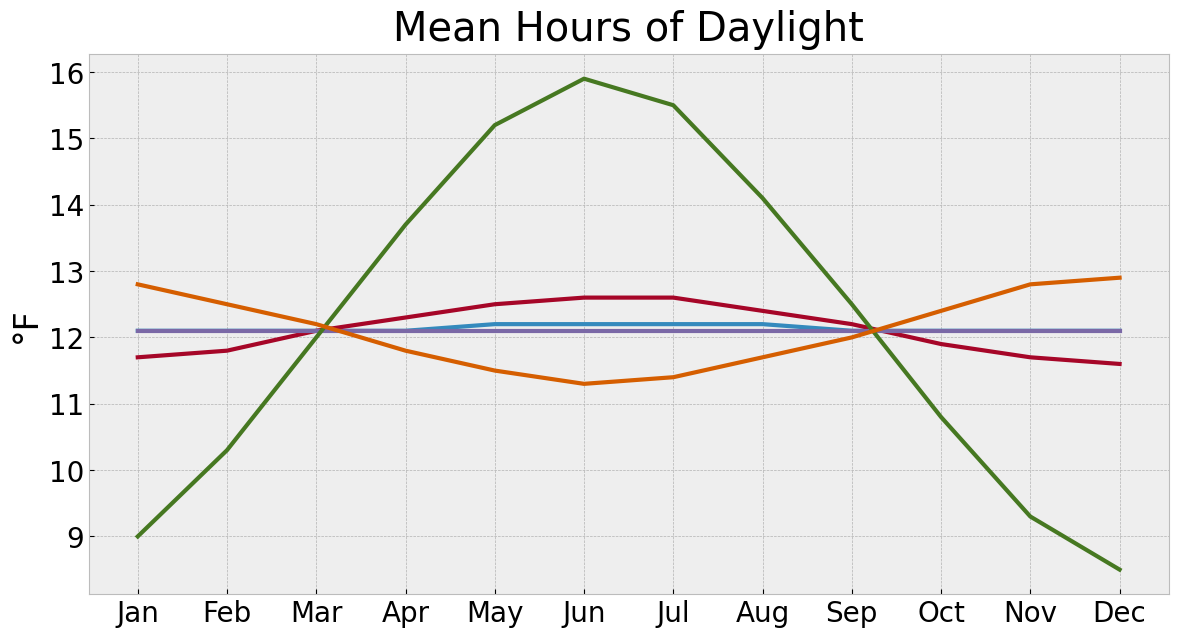

In [108]:
plt.style.use('bmh')
plt.rcParams.update({'font.size':20})
fig = plt.figure(figsize=(12, 6))
gs_main = fig.add_gridspec(1, 1)
gs_main.update(left=0.05, right=0.95, bottom=0.05, top=0.95)

axes = []
axes.append(fig.add_subplot(gs_main[0,0]))

for index, city_to_plot in enumerate(data.city):
    axes[0].plot(
        data.month,
        data['day_hours'].sel(city=city_to_plot),
        lw=3,
        color=bmh_colors(index+1),
        label=f"{city_to_plot.values} ({data.sel(city=city_to_plot).latitude.values})",
    )

# axes[0].legend(loc='best')
axes[0].set_ylabel(',')
# axes[0].set_ylim(40, 90)
# axes[0].set_yticks(np.arange(40, 95, 5))
axes[0].set_title("Mean Hours of Daylight", pad=10)
plt.show()

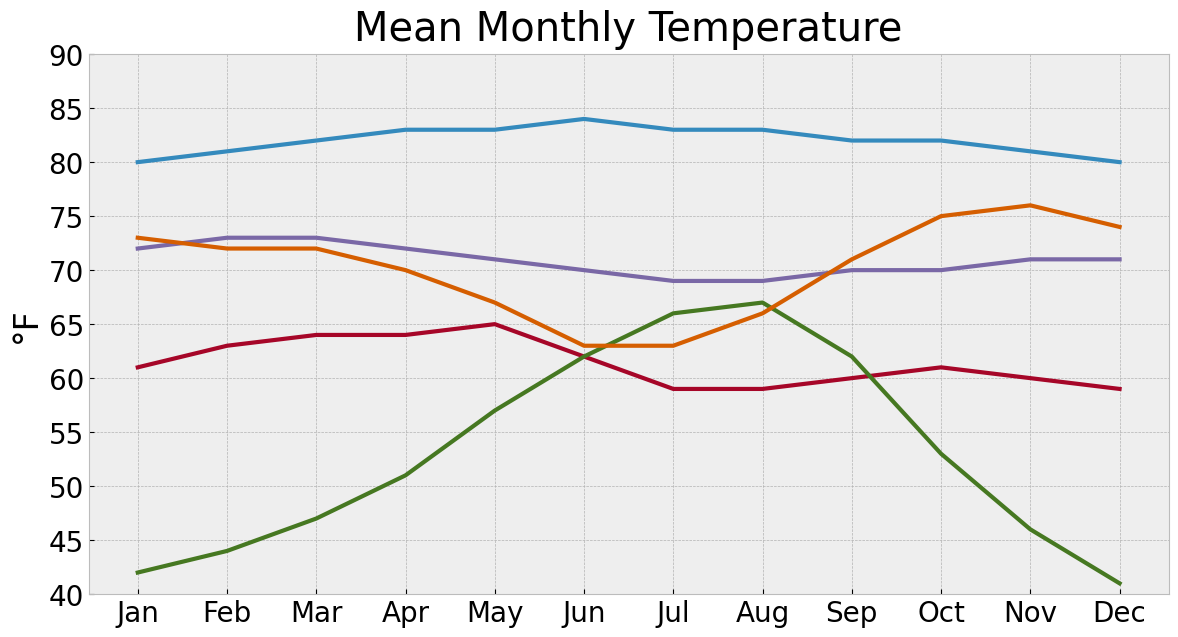

In [104]:
plt.style.use('bmh')
plt.rcParams.update({'font.size':20})
fig = plt.figure(figsize=(12, 6))
gs_main = fig.add_gridspec(1, 1)
gs_main.update(left=0.05, right=0.95, bottom=0.05, top=0.95)

axes = []
axes.append(fig.add_subplot(gs_main[0,0]))

for index, city_to_plot in enumerate(data.city):
    axes[0].plot(
        data.month,
        data['temperature'].sel(city=city_to_plot),
        lw=3,
        color=bmh_colors(index+1),
        label=f"{city_to_plot.values} ({data.sel(city=city_to_plot).latitude.values})",
    )

# axes[0].legend(loc='best')
axes[0].set_ylabel(',')
axes[0].set_ylim(40, 90)
axes[0].set_yticks(np.arange(40, 95, 5))
axes[0].set_title("Mean Monthly Temperature", pad=10)
plt.show()

In [59]:
city_colors[city_to_plot]

4

In [ ]:
honolulu_data = np.array([
    [73.0, 72.9,	73.7,	75.3,	76.6,	78.7,	80.2,	81.1,	81.4,	80.3,	78.4,	75.8],
    [73.5,	72.9,	73.7,	75.3,	76.7,	78.9,	79.9,	81.1,	81.4,	80.4,	78.2,	75.8],
    [73.5,	72.8,	73.9,	75.0,	76.8,	78.8,	80.0,	81.3,	81.3,	80.3,	78.4,	75.7],
    [73.6,	72.7,	73.7,	75.3,	76.8,	79.1,	80.2,	81.1,	81.4,	80.3,	78.4,	75.5],
    [73.1,	73.0,	73.6,	75.2,	76.9,	79.2,	80.3,	81.3,	81.2,	80.1,	78.3,	75.1],
    [73.1,	72.9,	73.6,	75.1,	76.8,	79.3,	80.3,	81.3,	81.2,	80.2,	78.6,	74.9],
    [73.1,	73.1,	73.9,	75.3,	76.9,	79.3,	80.3,	81.4,	81.3,	80.3,	78.4,	75.0],
    [73.0,	72.8,	74.0,	75.4,	77.1,	79.6,	80.5,	81.2,	81.2,	80.4,	78.1,	74.8],
    [73.0,	72.8,	74.1,	75.4,	77.0,	79.6,	80.3,	81.3,	81.0,	80.2,	77.9,	75.3],
    [73.4,	72.9,	74.0,	75.6,	77.3,	79.6,	80.4,	81.5,	81.2,	80.4,	77.9,	75.2],
    [73.1,	72.9,	74.2,	75.9,	77.2,	79.7,	80.4,	81.4,	81.0,	80.2,	77.7,	75.2],
    [72.8,	72.9,	74.2,	75.9,	77.2,	79.6,	80.5,	81.6,	81.0,	79.8,	77.6,	75.1],
    [72.9,	73.5,	74.0,	75.9,	77.3,	79.3,	80.5,	81.7,	80.9,	79.8,	77.4,	75.0],
    [72.9,	73.4,	74.1,	76.0,	77.4,	79.6,	80.6,	81.5,	80.9,	79.7,	77.2,	74.7],
    [73.3,	73.5,	74.2,	75.9,	77.3,	79.6,	80.5,	81.6,	81.1,	79.8,	77.1,	74.8],
    [73.2,	73.8,	74.2,	75.6,	77.3,	79.4,	80.9,	81.5,	81.1,	79.7,	77.3,	74.3],
    [73.3,	73.6,	74.2,	75.8,	77.6,	79.6,	80.7,	81.3,	81.1,	79.8,	77.0,	74.1],
    [73.3,	73.8,	74.1,	76.3,	77.6,	79.8,	80.9,	81.6,	81.0,	79.5,	76.8,	73.8],
    [73.1,	73.5,	74.5,	76.2,	77.8,	79.8,	80.7,	81.5,	81.0,	79.5,	77.0,	74.1],
    [73.0,	73.4,	74.7,	76.2,	77.8,	79.7,	80.6,	81.5,	80.6,	79.5,	77.0,	74.2],
    [73.3,	73.5,	74.8,	76.3,	77.7,	79.8,	80.7,	81.5,	80.5,	79.5,	76.9,	74.2],
    [73.1,	73.7,	75.2,	76.2,	78.0,	79.7,	80.6,	81.4,	80.6,	79.4,	76.9,	74.1],
    [73.0,	73.9,	74.7,	76.3,	77.9,	79.7,	81.0,	81.5,	80.4,	79.1,	76.8,	74.4],
    [73.1,	73.7,	74.6,	76.6,	78.1,	79.6,	80.8,	81.2,	80.8,	79.3,	76.5,	74.6],
    [73.2,	73.6,	74.5,	76.5,	78.0,	79.7,	81.0,	81.4,	81.0,	79.2,	76.4,	74.2],
    [73.1,	73.5,	74.6,	76.3,	78.1,	79.8,	80.9,	81.1,	80.8,	78.8,	76.3,	74.0],
    [73.4,	73.5,	74.7,	76.2,	78.1,	79.8,	81.0,	81.3,	80.8,	78.6,	76.2,	74.1],
    [73.3,	73.5,	74.8,	76.5,	78.2,	79.9,	81.0,	81.2,	80.5,	78.8,	76.2,	74.0],
    [73.4,	74.0,	75.1,	76.5,	78.4,	80.0,	81.1,	81.4,	80.7,	78.7,	76.0,	73.9]
]
               )

rochester_data = np.array([
[27.3, 23.2, 28.3, 40.0, 52.2, 62.9, 70.1, 70.9, 67.4, 56.4, 46.8, 32.6],
[27.0, 22.5, 28.7, 39.8, 52.4, 63.1, 70.0, 71.1, 67.3, 56.2, 46.5, 32.4],
[26.9, 22.7, 28.4, 39.8, 51.8, 62.7, 70.0, 71.2, 67.5, 56.8, 45.6, 33.1],
[26.5, 22.7, 28.8, 40.6, 52.1, 63.0, 70.6, 71.1, 67.2, 56.8, 44.5, 32.6],
[25.8, 22.0, 29.7, 40.7, 53.6, 64.0, 71.1, 70.7, 66.5, 55.7, 44.3, 33.0],
[26.2, 23.6, 30.0, 41.7, 54.5, 64.0, 70.8, 70.6, 66.3, 55.2, 43.6, 32.7],
[25.9, 24.5, 30.5, 41.5, 54.1, 64.1, 71.3, 71.3, 66.1, 54.5, 43.4, 31.8],
[24.6, 24.1, 30.1, 41.0, 54.4, 64.4, 71.8, 71.3, 65.3, 54.1, 43.2, 31.5],
[25.4, 23.9, 30.8, 41.5, 55.5, 65.1, 71.9, 71.2, 64.9, 53.8, 42.8, 31.2],
[24.6, 24.2, 31.3, 42.1, 55.2, 65.1, 71.1, 71.1, 64.9, 53.5, 42.3, 30.9],
[25.3, 24.0, 31.9, 43.0, 54.9, 65.9, 70.6, 70.2, 64.0, 53.7, 41.9, 30.3],
[25.7, 23.9, 32.6, 43.6, 55.3, 65.8, 71.1, 69.8, 64.0, 52.8, 41.0, 30.4],
[25.6, 24.3, 32.7, 45.0, 55.2, 66.3, 71.9, 69.6, 63.9, 52.3, 39.7, 30.5],
[24.8, 24.9, 33.2, 46.0, 55.3, 66.3, 71.4, 70.0, 63.2, 52.2, 40.0, 28.6],
[24.0, 25.1, 33.2, 46.0, 56.7, 66.8, 71.8, 69.7, 62.8, 52.8, 40.0, 28.7],
[23.3, 24.4, 32.8, 45.5, 56.7, 66.7, 71.7, 70.2, 61.8, 52.8, 39.9, 29.0],
[24.1, 24.7, 32.6, 46.1, 56.6, 66.9, 72.2, 69.9, 61.7, 51.2, 39.5, 28.6],
[24.8, 25.9, 32.5, 47.9, 57.5, 67.3, 72.5, 68.9, 62.0, 50.4, 39.8, 27.3],
[24.2, 27.1, 34.1, 48.5, 58.4, 67.8, 71.7, 68.4, 61.7, 49.8, 39.0, 27.3],
[24.3, 26.9, 34.4, 47.9, 59.0, 67.6, 71.6, 68.4, 61.8, 49.5, 38.2, 27.8],
[24.8, 27.2, 34.8, 48.6, 59.3, 68.1, 71.5, 68.5, 61.1, 49.7, 38.1, 28.7],
[25.5, 28.2, 34.4, 48.4, 60.1, 67.9, 71.9, 68.4, 60.7, 49.9, 37.7, 29.1],
[25.3, 27.7, 35.2, 48.5, 59.9, 68.1, 72.0, 68.1, 59.5, 49.4, 37.1, 29.5],
[24.5, 27.4, 36.2, 48.2, 59.7, 69.3, 71.2, 67.9, 59.2, 48.5, 36.3, 28.9],
[24.7, 27.4, 37.2, 49.0, 60.7, 69.5, 71.7, 68.1, 59.5, 47.9, 35.8, 28.0],
[23.8, 26.5, 38.4, 49.5, 61.0, 69.6, 71.5, 68.2, 59.5, 47.8, 36.6, 26.9],
[23.6, 26.9, 38.0, 50.0, 60.9, 69.9, 71.9, 68.1, 59.0, 47.6, 35.9, 27.0],
[23.4, 27.7, 38.1, 50.0, 60.6, 70.1, 71.9, 67.8, 58.0, 46.2, 35.4, 27.9],
[23.2, 24.7, 39.1, 50.9, 61.1, 69.9, 72.0, 68.0, 57.1, 45.9, 34.5, 27.5]])

seattle_data = np.array([
[40.6, 42.1, 44.8, 48.2, 53.5, 59.3, 63.5, 65.8, 63.6, 57.1, 49.8, 44.2],
[40.8, 41.6, 44.8, 48.1, 53.9, 59.6, 63.6, 65.6, 63.6, 56.7, 49.4, 44.2],
[40.4, 42.2, 44.4, 48.3, 54.1, 59.6, 63.6, 66.1, 63.4, 56.5, 49.8, 43.6],
[40.8, 42.8, 44.3, 48.7, 54.0, 60.1, 63.4, 66.3, 63.5, 56.3, 49.4, 43.1],
[40.7, 42.7, 44.5, 49.2, 54.3, 60.5, 63.4, 66.4, 62.9, 56.1, 48.5, 42.7],
[40.6, 43.1, 45.1, 49.3, 54.8, 60.3, 63.6, 66.2, 62.8, 56.4, 48.1, 43.0],
[41.4, 43.3, 45.1, 49.4, 55.1, 59.9, 64.4, 66.3, 62.7, 56.2, 48.4, 42.7],
[41.5, 42.9, 45.5, 49.7, 54.7, 59.9, 65.0, 66.6, 62.7, 55.9, 48.1, 42.8],
[41.4, 42.9, 45.7, 50.2, 55.0, 60.2, 65.0, 66.7, 62.5, 55.6, 47.4, 42.5],
[41.0, 43.1, 46.1, 50.1, 55.3, 60.2, 64.7, 66.5, 62.3, 54.9, 47.4, 43.1],
[40.7, 42.9, 45.7, 50.2, 56.0, 60.1, 65.1, 66.0, 61.9, 54.5, 47.1, 42.9],
[41.0, 43.0, 45.5, 50.4, 56.5, 60.3, 65.5, 66.2, 61.6, 54.2, 47.1, 42.6],
[41.1, 42.4, 45.9, 50.0, 56.8, 60.4, 65.4, 65.9, 61.4, 54.6, 46.6, 42.5],
[41.3, 42.7, 45.9, 50.1, 56.6, 60.3, 65.9, 65.8, 61.4, 54.5, 46.4, 42.3],
[41.1, 43.4, 46.4, 50.7, 56.7, 60.5, 65.7, 65.6, 60.8, 54.3, 46.5, 41.9],
[41.1, 43.9, 46.6, 51.1, 56.7, 60.4, 65.8, 65.5, 60.4, 53.4, 46.5, 41.8],
[41.6, 44.0, 46.5, 50.9, 56.6, 61.1, 65.9, 65.8, 60.0, 53.2, 46.4, 41.8],
[41.5, 43.7, 46.7, 51.0, 56.9, 61.3, 66.3, 65.4, 60.1, 52.8, 45.9, 41.8],
[40.9, 43.5, 47.0, 51.3, 56.8, 61.5, 66.4, 65.4, 59.9, 52.9, 45.5, 42.1],
[41.1, 43.7, 47.0, 51.8, 56.8, 61.7, 66.7, 65.4, 59.6, 52.8, 44.9, 42.0],
[41.3, 44.0, 46.8, 51.5, 56.8, 61.8, 66.6, 65.1, 59.5, 52.3, 44.6, 42.1],
[41.6, 44.0, 46.8, 51.6, 57.0, 61.3, 66.1, 64.9, 59.8, 51.9, 44.6, 41.9],
[41.9, 43.9, 46.9, 51.8, 57.5, 61.7, 66.3, 64.8, 59.4, 51.9, 44.9, 41.8],
[41.8, 44.1, 46.8, 52.1, 57.9, 62.2, 66.3, 64.7, 59.0, 51.8, 44.8, 41.7],
[41.5, 44.3, 46.7, 52.7, 57.8, 62.7, 66.0, 64.3, 58.9, 51.8, 44.5, 41.6],
[41.2, 44.3, 47.0, 53.2, 58.3, 62.6, 66.1, 64.2, 58.6, 51.0, 44.3, 41.5],
[41.7, 44.9, 47.3, 52.9, 58.0, 62.4, 66.4, 64.2, 58.9, 50.8, 44.1, 41.8],
[41.6, 44.8, 47.5, 52.9, 58.2, 62.7, 66.4, 64.5, 58.5, 50.3, 43.6, 41.5],
[41.4, 44.5, 48.0, 52.9, 58.2, 63.2, 66.4, 64.1, 58.1, 50.1, 44.0, 41.2],
])

In [ ]:
singapore_mean_avg_temperature = xr.DataArray(
    data=np.array([80,	81,	82,	83,83,84,	83,	83,82,82,	81,	80]),
    dims=['month'],
    coords={'month':np.arange(1,13,1)}
)
singapore_mean_avg_temperature.attrs['units'] = ','

rochester_mean_avg_temperature = xr.DataArray(
    data=rochester_data,
    dims=['day', 'month'],
    coords={'day':np.arange(1,30,1), 'month':np.arange(1,13,1)}
)
rochester_mean_avg_temperature.attrs['units'] = ','

seattle_mean_avg_temperature = xr.DataArray(
    data=seattle_data,
    dims=['day', 'month'],
    coords={'day':np.arange(1,30,1), 'month':np.arange(1,13,1)}
)
rochester_mean_avg_temperature.attrs['units'] = ','

bogota_mean_avg_temperature = xr.DataArray(
    data = np.array([55, 55, 56, 56, 56, 56, 55, 55, 55, 55, 56, 55]),
    dims=['month'],
    coords={'month':np.arange(1,13,1)}
)

sao_paulo_mean_avg_temperature = xr.DataArray(
    data = np.array([74, 75, 73, 71, 66, 63, 63, 64, 66, 69, 71, 73]),
    dims=['month'],
    coords={'month':np.arange(1,13,1)}
)


bismarck_mean_avg_temperature = xr.DataArray(
    data = np.array([14, 18, 30, 44, 56, 65, 71, 69, 59, 45, 30, 17]),
    dims=['month'],
    coords={'month':np.arange(1,13,1)}
)

plt.style.use('bmh')
[fig, ax] = plt.subplots(1, 1, figsize=(12,6))
ax.set_title('Daily-mean Temperature by Month', pad=10)
ax.plot(singapore_mean_avg_temperature.month, singapore_mean_avg_temperature, label='Singapore', lw=3)
ax.plot(bogota_mean_avg_temperature.month, bogota_mean_avg_temperature, label='Bogotá, CO', lw=3)
ax.plot(sao_paulo_mean_avg_temperature.month, sao_paulo_mean_avg_temperature, label='São Paulo, BR', lw=3)
# ax.plot(seattle_mean_avg_temperature.month, seattle_mean_avg_temperature.mean(dim='day'), label='Seattle, WA', lw=3)
ax.plot(rochester_mean_avg_temperature.month, rochester_mean_avg_temperature.mean(dim='day'), label='Rochester, NY', lw=3)
# ax.plot(bismarck_mean_avg_temperature.month, bismarck_mean_avg_temperature, label='Bismarck, ND', lw=3)
ax.set_xticks(np.arange(1, 13, 1))
ax.set_xlim(1, 12)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel('Month')

ax.set_ylabel(',')
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 110, 10))
ax.yaxis.set_major_locator(mticker.MaxNLocator(10, prune="lower"))
ax.axhline(y=32, lw=2, ls=":", color='k')

# ax.legend()
plt.show()